### Travel Insurance Purchase Predictor

In [20]:
import pandas as pd 
import torch 
from torch import nn 

### Preview the data 

In [21]:
data = pd.read_csv("TravelInsurancePrediction.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data.head() 

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### One hot encoding 

In [22]:
encoded = pd.get_dummies(data, dtype=int)
encoded.head() 

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0


In [23]:
X = encoded.drop(["TravelInsurance"], axis=1)
y = encoded["TravelInsurance"]
X

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,0,1,0,1,0,1,0,1
1983,28,1750000,5,1,0,1,0,1,1,0,0,1
1984,28,1150000,6,1,0,1,0,1,1,0,1,0
1985,34,1000000,6,0,0,1,0,1,0,1,0,1


### Visualize Age Distribution 

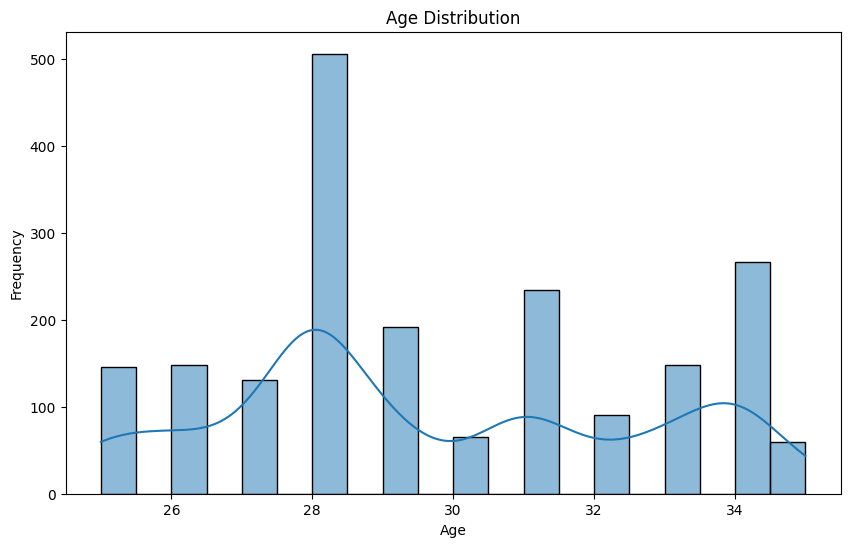

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Correlation Heatmap 

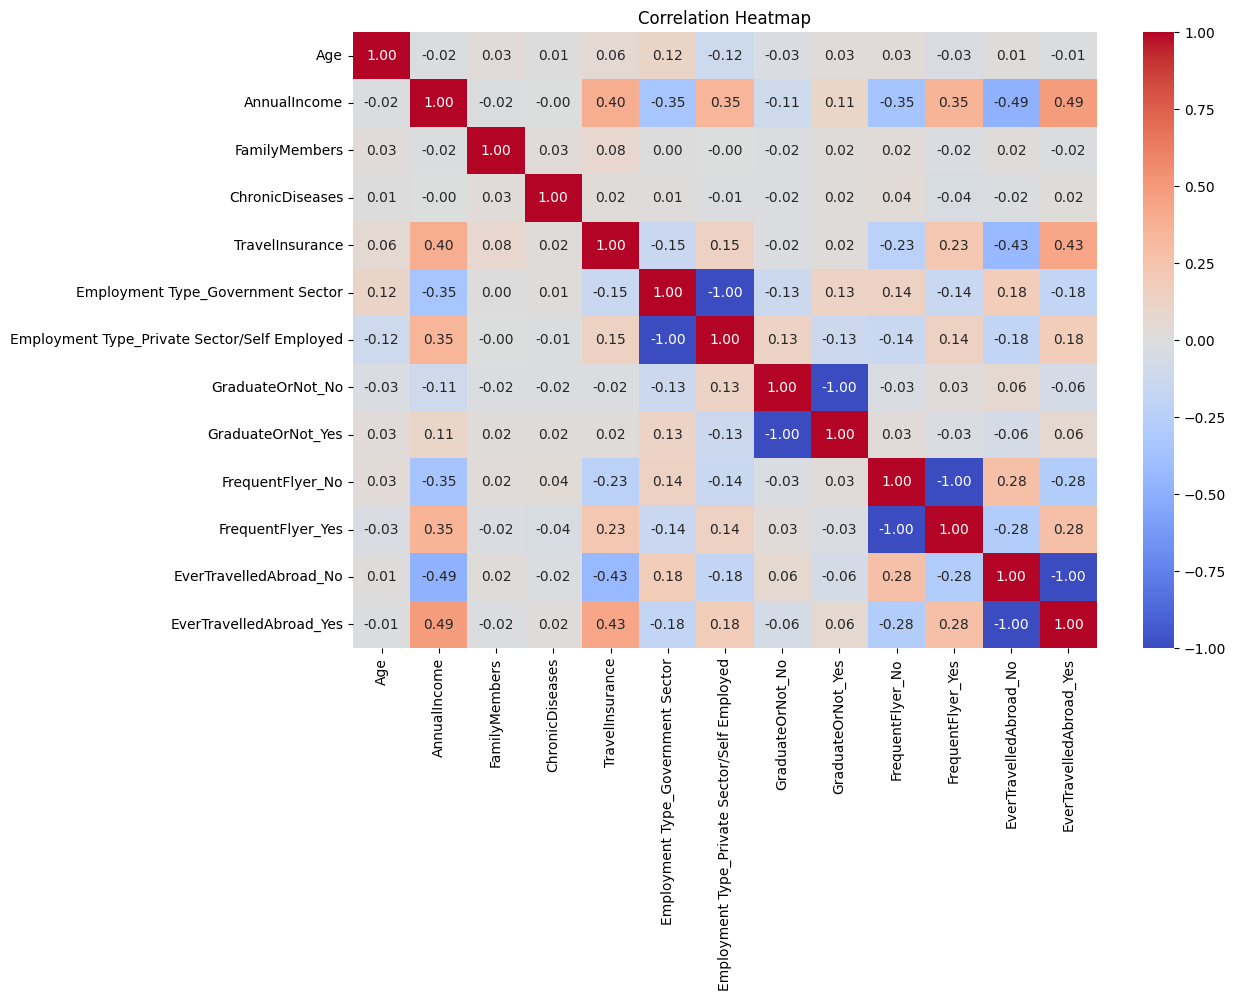

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Feature Scaling, Train test split, Convert to tensors

In [26]:
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()
df_scaled = std_scaler.fit_transform(X.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[col for col in X.columns])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, train_size=0.8, random_state=42) 

In [28]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1589, 398, 1589, 398)

In [29]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32) 
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32) 
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) 

### Creating the model

In [30]:
device = "cpu"

In [31]:
class TravelInsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=12, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=32), 
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x) 

In [32]:
model_0 = TravelInsuranceModel().to(device)
model_0

TravelInsuranceModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=12, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [33]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.1) 

In [34]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc =  (correct/len(y_pred)) * 100
    return acc 

In [35]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)
    
X_train, y_train = X_train_tensor.to(device), y_train_tensor.to(device)
X_test, y_test = X_test_tensor.to(device), y_test_tensor.to(device)

epochs = 1000 

for epoch in range(epochs):
    # Training 
    model_0.train() 
    train_logits = model_0(X_train).squeeze()  
    train_preds = torch.round(torch.sigmoid(train_logits)) 
    train_loss = loss_fn(train_logits, y_train) 
    train_acc = accuracy_fn(y_train, train_preds) 
    optimizer.zero_grad() 
    train_loss.backward() 
    optimizer.step() 

    # Testing 
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze() 
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test) 
        test_acc = accuracy_fn(y_test, test_preds)

    # Print out whats happenin
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Train acc: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        


Epoch: 0 | Train loss: 0.69971, Train acc: 35.81% | Test loss: 1.79522, Test acc: 64.57%
Epoch: 100 | Train loss: 0.48274, Train acc: 78.54% | Test loss: 0.54006, Test acc: 76.38%
Epoch: 200 | Train loss: 0.47260, Train acc: 79.17% | Test loss: 0.53837, Test acc: 77.14%
Epoch: 300 | Train loss: 0.46584, Train acc: 79.23% | Test loss: 0.49034, Test acc: 78.89%
Epoch: 400 | Train loss: 0.46505, Train acc: 78.73% | Test loss: 0.57571, Test acc: 78.89%
Epoch: 500 | Train loss: 0.46381, Train acc: 78.79% | Test loss: 0.48928, Test acc: 78.64%
Epoch: 600 | Train loss: 0.46660, Train acc: 78.23% | Test loss: 0.48576, Test acc: 78.39%
Epoch: 700 | Train loss: 0.47152, Train acc: 79.86% | Test loss: 0.49563, Test acc: 77.89%
Epoch: 800 | Train loss: 0.44159, Train acc: 82.00% | Test loss: 0.45476, Test acc: 82.66%
Epoch: 900 | Train loss: 0.44780, Train acc: 82.19% | Test loss: 0.46344, Test acc: 82.41%


### Making Predictions

In [36]:
model_0.eval()
with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

### Confusion Matrix

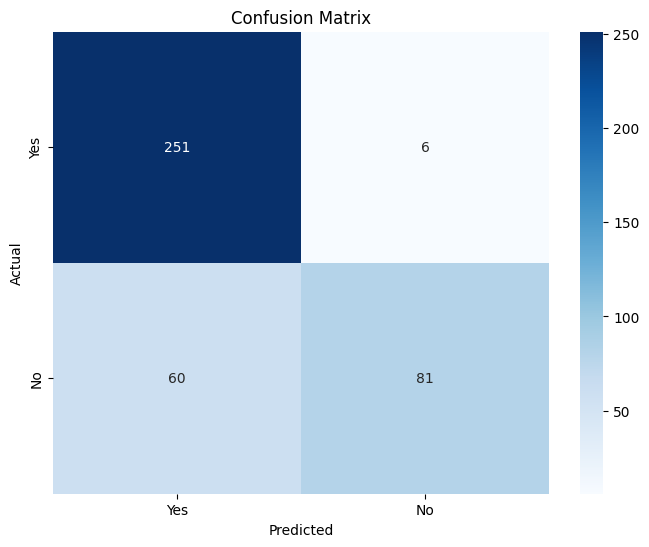

In [37]:
y_test_np = y_test.cpu().numpy()
test_preds_np = test_preds.cpu().numpy()


results_df = pd.DataFrame({'Actual': y_test_np, 'Predicted': test_preds_np})
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test_np, test_preds_np)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Bar chart

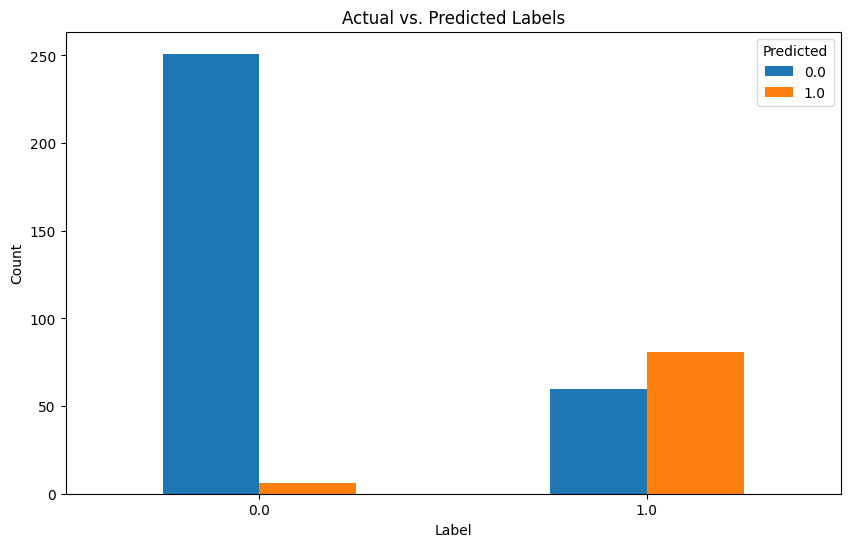

In [38]:
results_df.value_counts().unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Actual vs. Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
